In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib.pyplot import figure
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from prettytable import PrettyTable
from kneed import KneeLocator
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns

C:\Users\binmh\AppData\Local\Temp\ipykernel_32216\1584852383.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('california_housing.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  300 non-null    float64
 1   total_rooms         300 non-null    float64
 2   total_bedrooms      300 non-null    float64
 3   population          300 non-null    float64
 4   households          300 non-null    float64
 5   median_income       300 non-null    float64
 6   median_house_value  300 non-null    float64
dtypes: float64(7)
memory usage: 16.5 KB


In [4]:
df.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,18.0,3278.0,762.0,1338.0,550.0,2.9891,116500.0
1,44.0,2440.0,485.0,1011.0,442.0,4.1490,443600.0
2,44.0,2087.0,447.0,1270.0,423.0,2.3889,86100.0
3,23.0,2850.0,864.0,2249.0,777.0,2.6957,191700.0
4,34.0,1943.0,500.0,1078.0,446.0,1.1296,93800.0


In [5]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
housing_median_age,300.0,28.38,13.47,3.00,16.00,28.00,39.00,52.00
total_rooms,300.0,2631.64,1849.90,191.00,1512.25,2105.00,3216.75,14944.00
total_bedrooms,300.0,525.37,338.41,44.00,316.75,419.50,665.00,2490.00
population,300.0,1379.52,957.39,29.00,832.50,1146.50,1677.00,8793.00
households,300.0,486.34,312.45,14.00,300.75,390.00,593.00,2407.00
median_income,300.0,3.80,1.82,0.71,2.38,3.43,4.64,11.52
median_house_value,300.0,197034.38,113628.09,32500.00,109650.00,168000.00,252075.00,500001.00


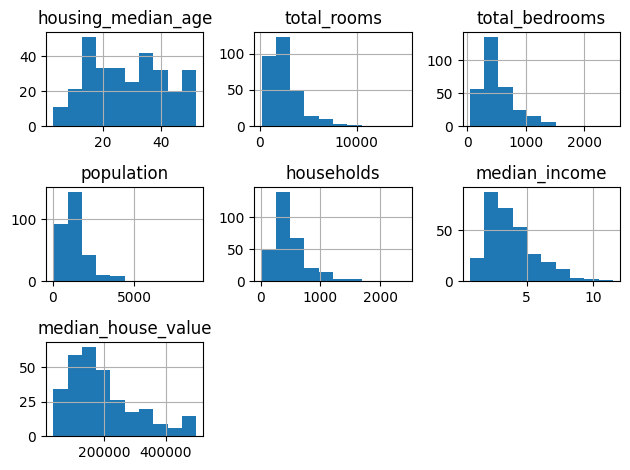

In [6]:
df[df.columns].hist()
plt.tight_layout()

Data sample decrease by means of sampling to simplify example

In [7]:
from pandas.core.array_algos import replace
df_sample = df.sample(n=300, random_state = 1, replace = False)

In [8]:
print(df_sample.shape)

(300, 7)


array([[<Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>],
       [<Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>, <Axes: >,
        <Axes: >]], dtype=object)

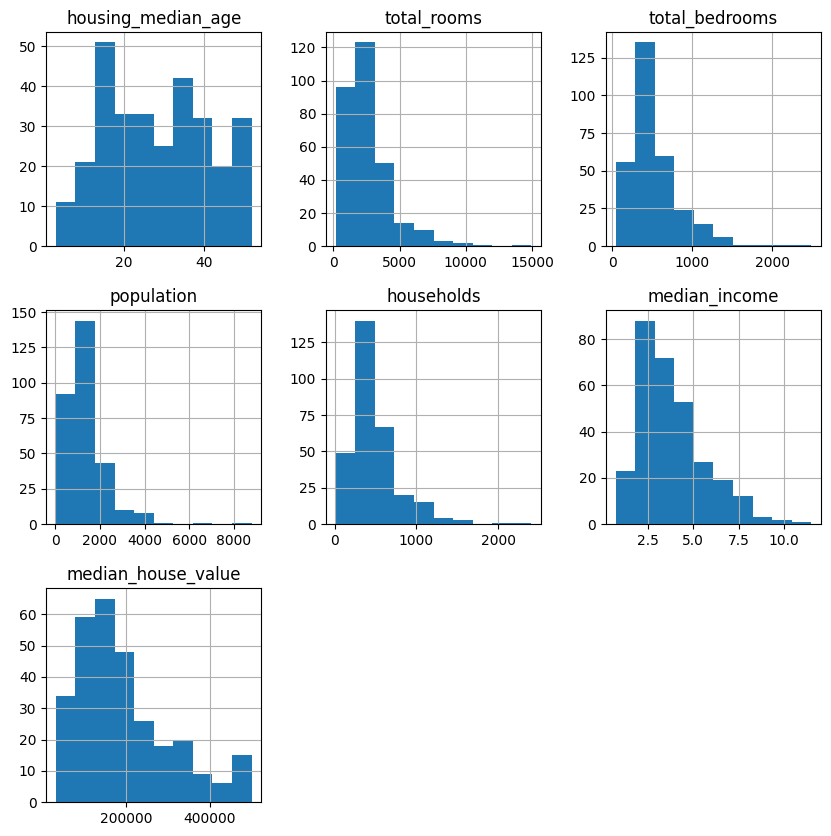

In [9]:
df_sample.hist(figsize=(10,10))

In [10]:
df_sample.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
housing_median_age,300.0,28.38,13.47,3.00,16.00,28.00,39.00,52.00
total_rooms,300.0,2631.64,1849.90,191.00,1512.25,2105.00,3216.75,14944.00
total_bedrooms,300.0,525.37,338.41,44.00,316.75,419.50,665.00,2490.00
population,300.0,1379.52,957.39,29.00,832.50,1146.50,1677.00,8793.00
households,300.0,486.34,312.45,14.00,300.75,390.00,593.00,2407.00
median_income,300.0,3.80,1.82,0.71,2.38,3.43,4.64,11.52
median_house_value,300.0,197034.38,113628.09,32500.00,109650.00,168000.00,252075.00,500001.00


## **Data Standardization**

In [11]:
scaler = StandardScaler()
mat = df_sample.values
df_scaled = pd.DataFrame(scaler.fit_transform(mat))
df_scaled.columns = list(df_sample.columns)

# **Hierarchical Clustering**

## **Hierarchical Clustering on Original Data**

In [12]:
SMALL_SIZE = 8
MEDIUM_SIZE = 12
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [13]:
linkage_data_ward = linkage(df_sample, method='ward', metric='euclidean')
linkage_data_centroid = linkage(df_sample, method='centroid' , metric='euclidean')
linkage_data_complete = linkage(df_sample, method='complete' , metric='euclidean')
linkage_data_single = linkage(df_sample, method = 'single', metric = 'euclidean')
linkage_data_average = linkage(df_sample, method = 'average', metric = 'euclidean')

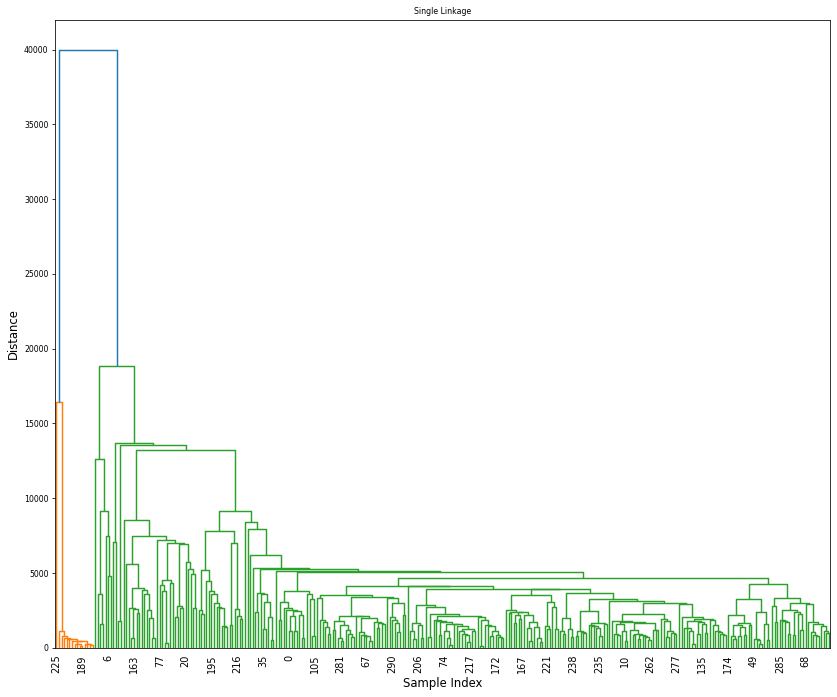

In [14]:
figure(num=None,figsize=(12,10),dpi=70,facecolor='w',edgecolor='k')
dendrogram(linkage_data_single)
plt.title("Single Linkage")
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.xticks(ax.get_xticks()[::10])
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.tight_layout()

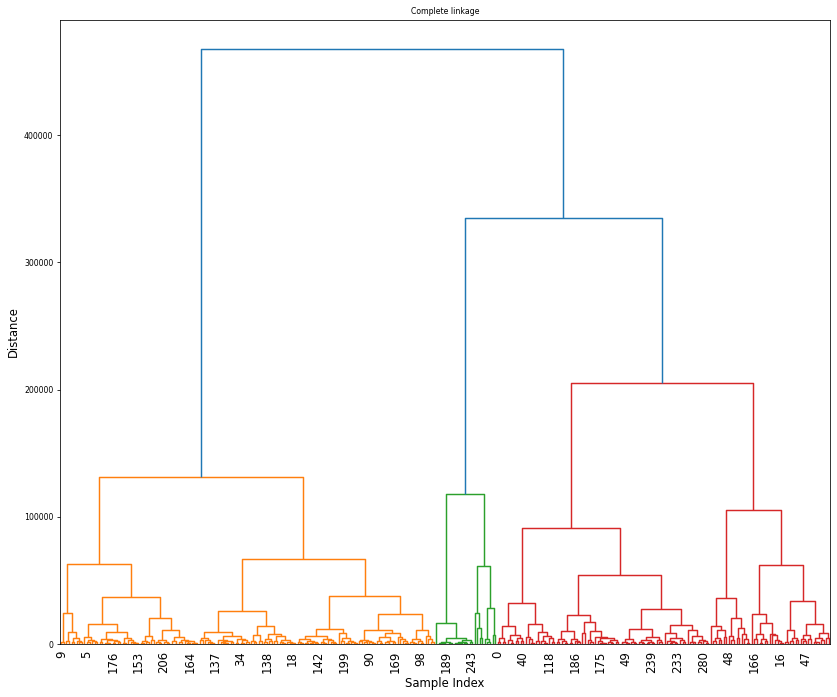

In [15]:
figure(num=None,figsize=(12,10),dpi=70,facecolor='w',edgecolor='k')
dendrogram(linkage_data_complete)
plt.title("Complete linkage")
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=12)
plt.xticks(ax.get_xticks()[::10])
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.tight_layout()

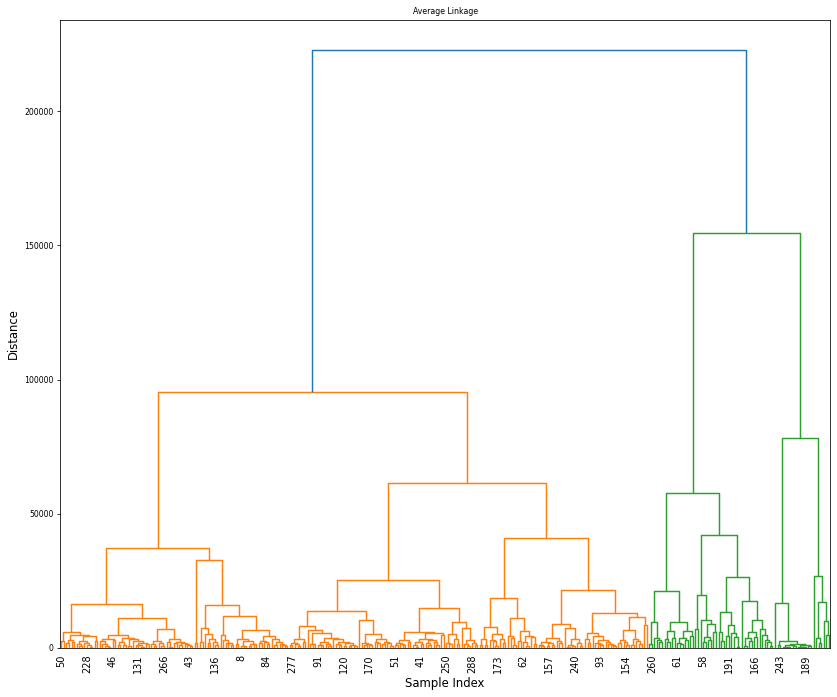

In [16]:
figure(num=None,figsize=(12,10),dpi=70,facecolor='w',edgecolor='k')
dendrogram(linkage_data_average)
plt.title("Average Linkage")
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.xticks(ax.get_xticks()[::10])
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.tight_layout()

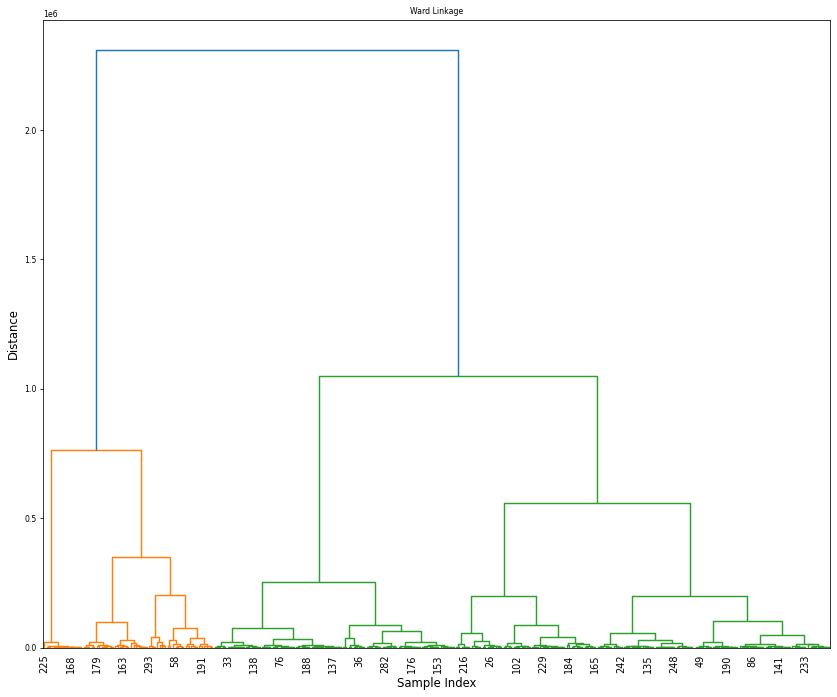

In [17]:
figure(num=None,figsize=(12,10),dpi=70,facecolor='w',edgecolor='k')
dendrogram(linkage_data_ward)
plt.title("Ward Linkage")
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.xticks(ax.get_xticks()[::10])
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.tight_layout()

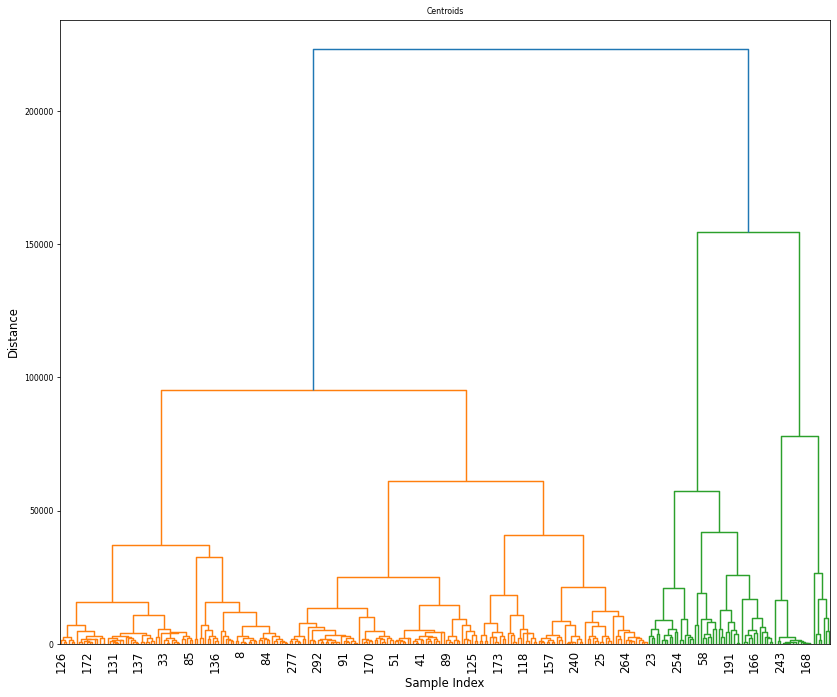

In [18]:
figure(num=None,figsize=(12,10),dpi=70,facecolor='w',edgecolor='k')
dendrogram(linkage_data_centroid)
plt.title("Centroids")
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=12)
plt.xticks(ax.get_xticks()[::10])
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.tight_layout()

## **Hierarchical Clustering on Standardized Data**

In [19]:
linkage_data_ward = linkage(df_scaled, method='ward', metric='euclidean')
linkage_data_centroid = linkage(df_scaled, method='centroid' , metric='euclidean')
linkage_data_complete = linkage(df_scaled, method='complete' , metric='euclidean')
linkage_data_single = linkage(df_scaled, method = 'single', metric = 'euclidean')
linkage_data_average = linkage(df_scaled, method = 'average', metric = 'euclidean')

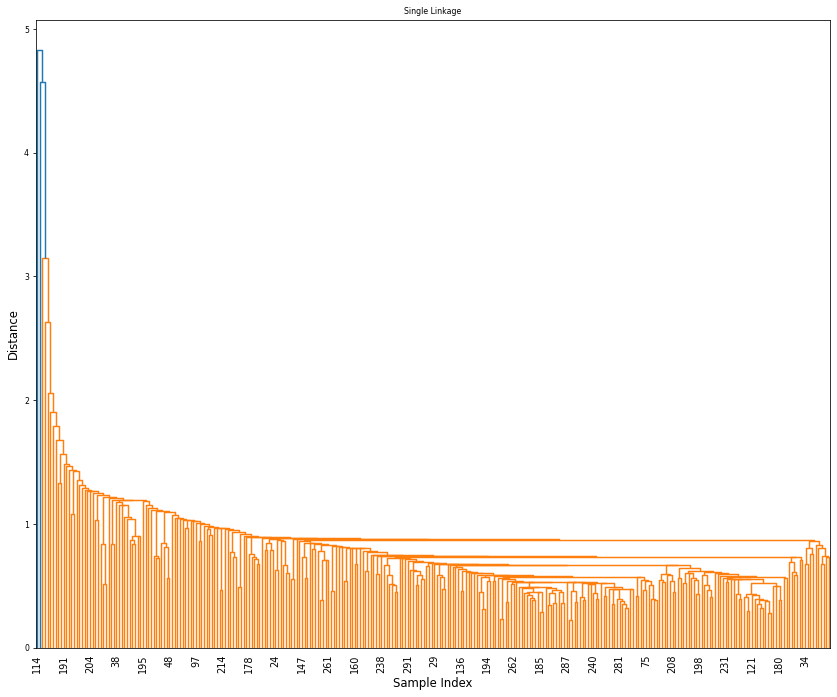

In [20]:
figure(num=None,figsize=(12,10),dpi=70,facecolor='w',edgecolor='k')
dendrogram(linkage_data_single)
plt.title("Single Linkage")
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.xticks(ax.get_xticks()[::10])
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.tight_layout()

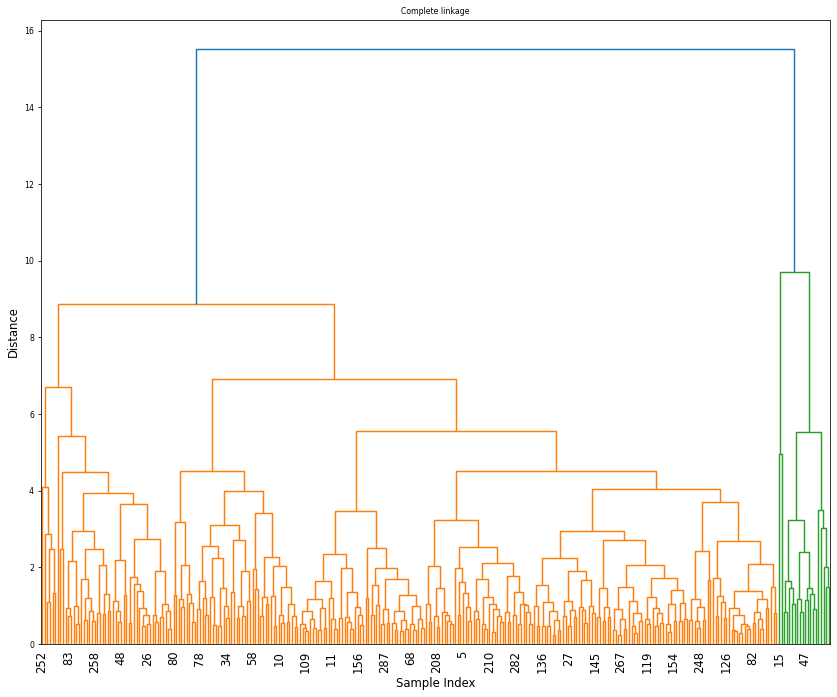

In [21]:
figure(num=None,figsize=(12,10),dpi=70,facecolor='w',edgecolor='k')
dendrogram(linkage_data_complete)
plt.title("Complete linkage")
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=12)
plt.xticks(ax.get_xticks()[::10])
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.tight_layout()

Text(0, 0.5, 'Distance')

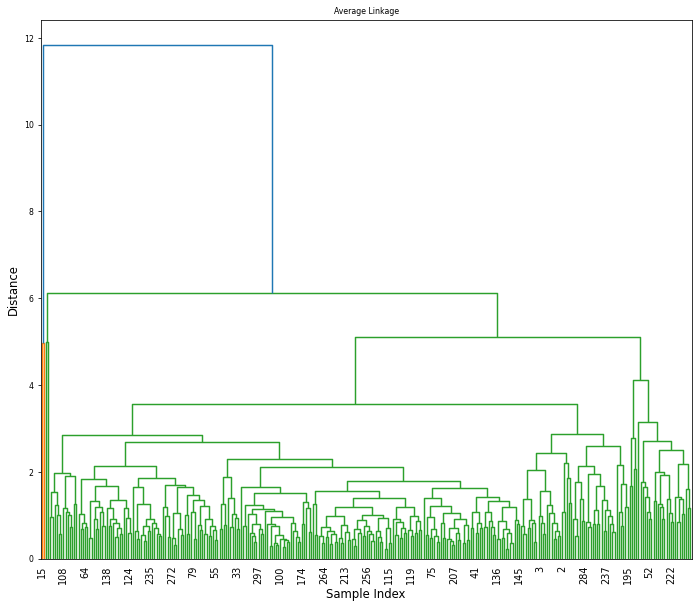

In [22]:
figure(num=None,figsize=(12,10),dpi=70,facecolor='w',edgecolor='k')
dendrogram(linkage_data_average)
plt.title("Average Linkage")
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.xticks(ax.get_xticks()[::10])
plt.xlabel('Sample Index')
plt.ylabel('Distance')

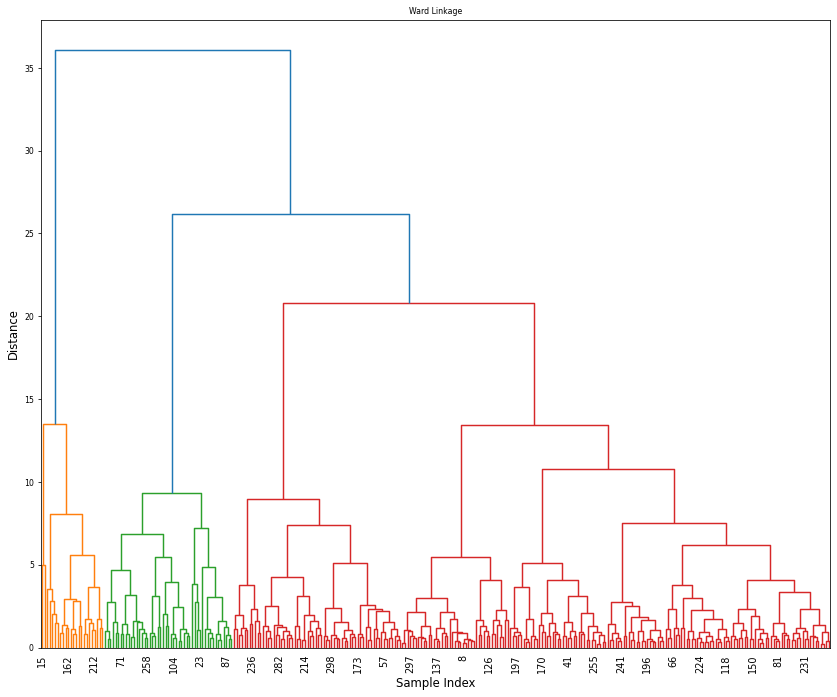

In [23]:
figure(num=None,figsize=(12,10),dpi=70,facecolor='w',edgecolor='k')
dendrogram(linkage_data_ward)
plt.title("Ward Linkage")
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.xticks(ax.get_xticks()[::10])
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.tight_layout()

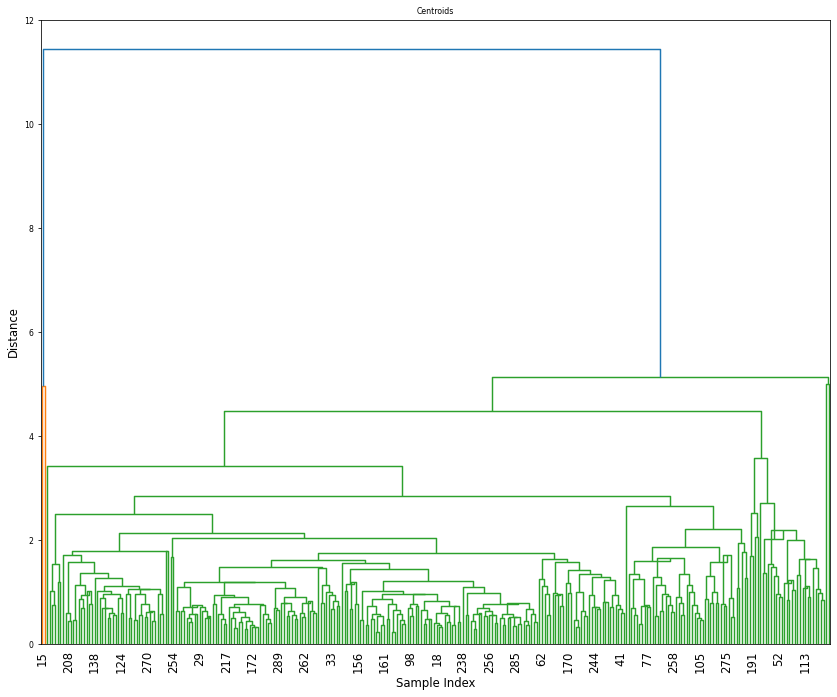

In [24]:
figure(num=None,figsize=(12,10),dpi=70,facecolor='w',edgecolor='k')
dendrogram(linkage_data_centroid)
plt.title("Centroids")
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=12)
plt.xticks(ax.get_xticks()[::10])
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.tight_layout()

# **K-means clustering**

## **K-means Clustering on Original Data**

### K-means parameter specification

In [25]:
kmeans_2 = KMeans(
    init = "random",
    n_clusters=2,
    n_init=10,
    max_iter=300,
    random_state=35
)

kmeans_3 = KMeans(
    init = "random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=35
)

kmeans_4 = KMeans(
    init = "random",
    n_clusters=4,
    n_init=10,
    max_iter=300,
    random_state=35
)

In [26]:
kmeans_2.fit(df_sample)
kmeans_3.fit(df_sample)
kmeans_4.fit(df_sample)

KMeans(init='random', n_clusters=4, n_init=10, random_state=35)

In [27]:
labels_2 = kmeans_2.labels_
labels_3 = kmeans_3.labels_
labels_4 = kmeans_4.labels_

In [28]:
df_sample['labels_2']=labels_2
df_sample['labels_3']=labels_3
df_sample['labels_4']=labels_4

In [29]:
df_sample.head(20)

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,labels_2,labels_3,labels_4
189,38.0,1663.0,295.0,781.0,301.0,5.0519,227000.0,1,1,0
123,5.0,2840.0,403.0,1363.0,403.0,7.6180,341400.0,0,0,2
185,13.0,5415.0,827.0,2061.0,714.0,7.3681,353100.0,0,0,2
213,14.0,2714.0,361.0,1259.0,375.0,7.7738,387500.0,0,0,2
106,52.0,2805.0,573.0,1325.0,522.0,2.5083,70100.0,1,2,1
127,17.0,2414.0,594.0,2487.0,582.0,1.0955,62700.0,1,2,1
176,51.0,1905.0,291.0,707.0,284.0,6.2561,431000.0,0,0,3
73,52.0,2867.0,496.0,978.0,513.0,3.1477,291200.0,0,1,2
275,16.0,1914.0,446.0,828.0,332.0,2.0577,69000.0,1,2,1
242,31.0,602.0,153.0,112.0,47.0,1.0667,34200.0,1,2,1


In [30]:
df_sample['labels_2'].value_counts()

labels_2
1    221
0     79
Name: count, dtype: int64

In [31]:
df_sample['labels_3'].value_counts()

labels_3
2    151
1    102
0     47
Name: count, dtype: int64

In [32]:
df_sample['labels_4'].value_counts()

labels_4
0    121
1    100
2     57
3     22
Name: count, dtype: int64

In [33]:
df_sample.groupby('labels_2').mean()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,labels_3,labels_4
labels_2,,,,,,,,,
0,27.367089,3540.835443,614.962025,1563.291139,572.367089,5.789301,355683.721519,0.405063,2.278481
1,28.742081,2306.628959,493.339367,1313.823529,455.583710,3.083134,140322.624434,1.683258,0.452489


In [34]:
df_sample.groupby('labels_3').mean()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,labels_2,labels_4
labels_3,,,,,,,,,
0,28.234043,3365.234043,578.021277,1393.489362,533.893617,6.386904,406627.957447,0.000000,2.468085
1,29.088235,2878.509804,567.745098,1481.921569,537.431373,4.128463,226902.941176,0.686275,0.627451
2,27.947020,2236.536424,480.350993,1305.993377,437.019868,2.764501,111620.529801,1.000000,0.662252


In [35]:
df_sample.groupby('labels_4').mean()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,labels_2,labels_3
labels_4,,,,,,,,,
0,29.31405,2448.256198,517.181818,1373.471074,485.793388,3.642327,181378.512397,1.0,1.421488
1,28.05000,2135.260000,464.490000,1241.650000,419.030000,2.406510,90645.000000,1.0,2.000000
2,25.00000,3841.736842,673.157895,1732.666667,620.929825,5.406139,309985.964912,0.0,0.561404
3,33.50000,2761.227273,464.181818,1124.454545,446.545455,6.782041,474082.454545,0.0,0.000000


In [36]:
kmeans_2.cluster_centers_[:, :7]

array([[2.73670886e+01, 3.54083544e+03, 6.14962025e+02, 1.56329114e+03,
        5.72367089e+02, 5.78930127e+00, 3.55683722e+05],
       [2.87420814e+01, 2.30662896e+03, 4.93339367e+02, 1.31382353e+03,
        4.55583710e+02, 3.08313394e+00, 1.40322624e+05]])

In [37]:
kmeans_3.cluster_centers_[:, :7]

array([[2.82340426e+01, 3.36523404e+03, 5.78021277e+02, 1.39348936e+03,
        5.33893617e+02, 6.38690426e+00, 4.06627957e+05],
       [2.90882353e+01, 2.87850980e+03, 5.67745098e+02, 1.48192157e+03,
        5.37431373e+02, 4.12846275e+00, 2.26902941e+05],
       [2.79470199e+01, 2.23653642e+03, 4.80350993e+02, 1.30599338e+03,
        4.37019868e+02, 2.76450132e+00, 1.11620530e+05]])

In [38]:
kmeans_4.cluster_centers_[:, :7]

array([[2.93140496e+01, 2.44825620e+03, 5.17181818e+02, 1.37347107e+03,
        4.85793388e+02, 3.64232727e+00, 1.81378512e+05],
       [2.80500000e+01, 2.13526000e+03, 4.64490000e+02, 1.24165000e+03,
        4.19030000e+02, 2.40651000e+00, 9.06450000e+04],
       [2.50000000e+01, 3.84173684e+03, 6.73157895e+02, 1.73266667e+03,
        6.20929825e+02, 5.40613860e+00, 3.09985965e+05],
       [3.35000000e+01, 2.76122727e+03, 4.64181818e+02, 1.12445455e+03,
        4.46545455e+02, 6.78204091e+00, 4.74082455e+05]])

In [39]:
kmeans_2.n_iter_

9

In [40]:
kmeans_3.n_iter_

7

In [41]:
kmeans_4.n_iter_

20

### K-means for different k values

In [42]:
# k values
k_values = [2, 3, 4, 5, 6, 7, 8, 9, 10]

# lists to store results
k_list = []
inertia_list = []
cluster_sizes_list = []
centroids_list = []
iterations_list = []

# Iteration for different number of centroids
for k in k_values:
    # Initialize KMeans with the current k value
    kmeans = KMeans(
    init = "random",
    n_clusters=k,
    n_init=10,
    max_iter=300,
    random_state=35
    )
    
    # Fit KMeans to the data
    kmeans.fit(df_sample)
  
    # Get the inertia (SSE)
    inertia = kmeans.inertia_

    # Get the number of observations in each cluster
    cluster_sizes = pd.Series(kmeans.labels_).value_counts().sort_index().tolist()
    
    # Get the cluster centers (centroids)
    centroids = kmeans.cluster_centers_[: ,:7]

    # Get the number of iterations required for convergence
    iterations = kmeans.n_iter_

    # Append results to lists
    k_list.append(k)
    inertia_list.append(inertia)
    cluster_sizes_list.append(cluster_sizes)
    centroids_list.append(centroids)
    iterations_list.append(iterations)

# Create a DataFrame to store the results
final_df = pd.DataFrame({
    'k': k_list,
    'inertia': inertia_list,
    'cluster_sizes': cluster_sizes_list,
    'centroids': centroids_list,
    'iterations': iterations_list
})

# Display the results
table = PrettyTable()
table.field_names = final_df.columns

for column in final_df.columns:
    table.max_width[column] = 50

for row in final_df.values:
    table.add_row(row)
    
print(table)

+----+--------------------+-----------------------------------------+----------------------------------------------------+------------+
| k  |      inertia       |              cluster_sizes              |                     centroids                      | iterations |
+----+--------------------+-----------------------------------------+----------------------------------------------------+------------+
| 2  | 1162573439508.1873 |                [79, 221]                |   [[2.73670886e+01 3.54083544e+03 6.14962025e+02   |     9      |
|    |                    |                                         |                   1.56329114e+03                   |            |
|    |                    |                                         |    5.72367089e+02 5.78930127e+00 3.55683722e+05]   |            |
|    |                    |                                         |    [2.87420814e+01 2.30662896e+03 4.93339367e+02   |            |
|    |                    |                     

In [43]:
final_df

,k,inertia,cluster_sizes,centroids,iterations
0,2,1.162573e+12,"[79, 221]","[[27.367088607594937, 3540.835443037975, 614.9...",9
1,3,6.044871e+11,"[47, 102, 151]","[[28.23404255319149, 3365.2340425531916, 578.0...",7
2,4,2.843646e+11,"[121, 100, 57, 22]","[[29.31404958677686, 2448.2561983471073, 517.1...",20
3,5,1.691824e+11,"[89, 54, 22, 43, 92]","[[28.865168539325843, 2367.76404494382, 497.0,...",4
4,6,1.230764e+11,"[21, 58, 82, 16, 34, 89]","[[24.04761904761905, 4328.428571428572, 708.42...",16
5,7,9.433828e+10,"[70, 57, 31, 19, 34, 52, 37]","[[28.271428571428572, 2456.5714285714284, 514....",45
6,8,6.897229e+10,"[57, 59, 37, 40, 31, 23, 17, 36]","[[25.56140350877193, 2238.754385964912, 484.36...",17
7,9,5.007916e+10,"[32, 39, 26, 29, 15, 9, 56, 57, 37]","[[29.84375, 2637.875, 580.59375, 1458.00000000...",16
8,10,3.752571e+10,"[27, 17, 15, 8, 44, 38, 37, 37, 25, 52]","[[28.62962962962963, 2817.3703703703704, 548.8...",11


### **ANOVA Analysis**

In [44]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 189 to 37
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  300 non-null    float64
 1   total_rooms         300 non-null    float64
 2   total_bedrooms      300 non-null    float64
 3   population          300 non-null    float64
 4   households          300 non-null    float64
 5   median_income       300 non-null    float64
 6   median_house_value  300 non-null    float64
 7   labels_2            300 non-null    int32  
 8   labels_3            300 non-null    int32  
 9   labels_4            300 non-null    int32  
dtypes: float64(7), int32(3)
memory usage: 22.3 KB


In [45]:
def create_anova_table(label_name, data_frame, features):
    anova_results = []

    # Iterate over each feature
    for feature in features:
        # Fit an OLS model
        model = ols(f'{label_name} ~ {feature}', data=data_frame).fit()

        # ANOVA and relevant statistics
        anova_result = sm.stats.anova_lm(model, typ=2)
        sum_sq = anova_result.loc[feature, 'sum_sq']
        df = anova_result.loc[feature, 'df']
        f_value = anova_result.loc[feature, 'F']
        p_value = anova_result.loc[feature, 'PR(>F)']

        # Add results for each feature
        anova_results.append([feature, sum_sq, df, f_value, p_value])

        # Add row for the residual after each feature
        residual_sum_sq = anova_result.loc["Residual", "sum_sq"]
        residual_df = anova_result.loc["Residual", "df"]
        anova_results.append(["Residual", residual_sum_sq, residual_df, "", ""])
        
    # Create a DataFrame from the list of ANOVA results
    anova_df = pd.DataFrame(anova_results, columns=["Feature", "Sum Sq", "DF", "F-value", "PR(>F)"])
    return anova_df

In [46]:
features = ["housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income", "median_house_value"]

In [47]:
create_anova_table("labels_2", df_sample, features)

,Feature,Sum Sq,DF,F-value,PR(>F)
0,housing_median_age,0.118021,1.0,0.605563,0.437081
1,Residual,58.078646,298.0,,
2,total_rooms,5.042008,1.0,28.266917,0.0
3,Residual,53.154659,298.0,,
4,total_bedrooms,1.463053,1.0,7.684858,0.005919
5,Residual,56.733614,298.0,,
6,population,0.769083,1.0,3.990883,0.046656
7,Residual,57.427584,298.0,,
8,households,1.582472,1.0,8.329652,0.004185
9,Residual,56.614195,298.0,,


In [48]:
create_anova_table("labels_3", df_sample, features)

,Feature,Sum Sq,DF,F-value,PR(>F)
0,housing_median_age,0.063121,1.0,0.116194,0.733439
1,Residual,161.883546,298.0,,
2,total_rooms,8.661094,1.0,16.837894,0.000053
3,Residual,153.285572,298.0,,
4,total_bedrooms,2.510696,1.0,4.692715,0.031083
5,Residual,159.435970,298.0,,
6,population,0.504510,1.0,0.931256,0.335319
7,Residual,161.442157,298.0,,
8,households,3.211508,1.0,6.029095,0.014643
9,Residual,158.735159,298.0,,


In [49]:
create_anova_table("labels_4", df_sample, features)

,Feature,Sum Sq,DF,F-value,PR(>F)
0,housing_median_age,0.119145,1.0,0.134211,0.714365
1,Residual,264.547522,298.0,,
2,total_rooms,9.170245,1.0,10.695778,0.0012
3,Residual,255.496421,298.0,,
4,total_bedrooms,1.319699,1.0,1.493354,0.222662
5,Residual,263.346968,298.0,,
6,population,0.338963,1.0,0.382143,0.536931
7,Residual,264.327703,298.0,,
8,households,1.227884,1.0,1.388974,0.239519
9,Residual,263.438782,298.0,,


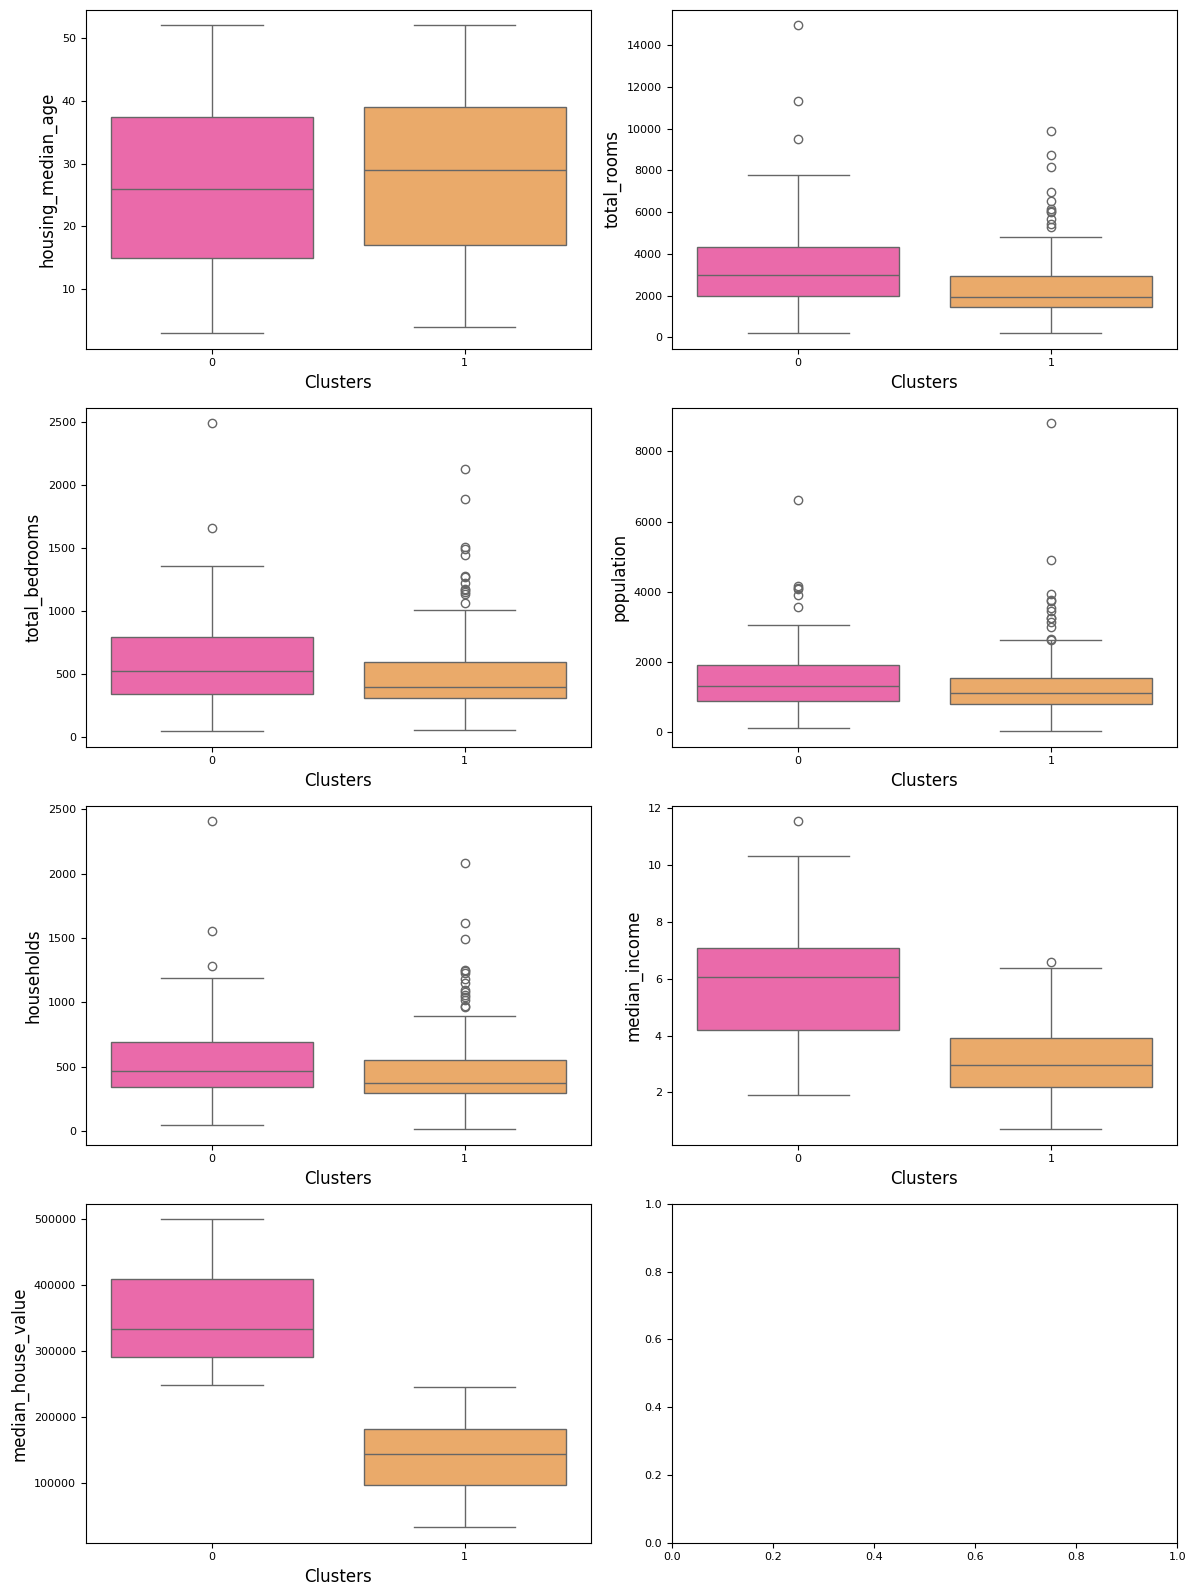

In [50]:
fig, axes = plt.subplots(4, 2, figsize=(12, 16))
axes = axes.flatten()

# box plots
for i, feature in enumerate(features):
    sns.boxplot(data=df_sample, x='labels_2', y=feature, ax=axes[i], hue='labels_2', palette='spring', legend=False)
    axes[i].set_xlabel('Clusters')
    axes[i].set_ylabel(feature)

plt.tight_layout()

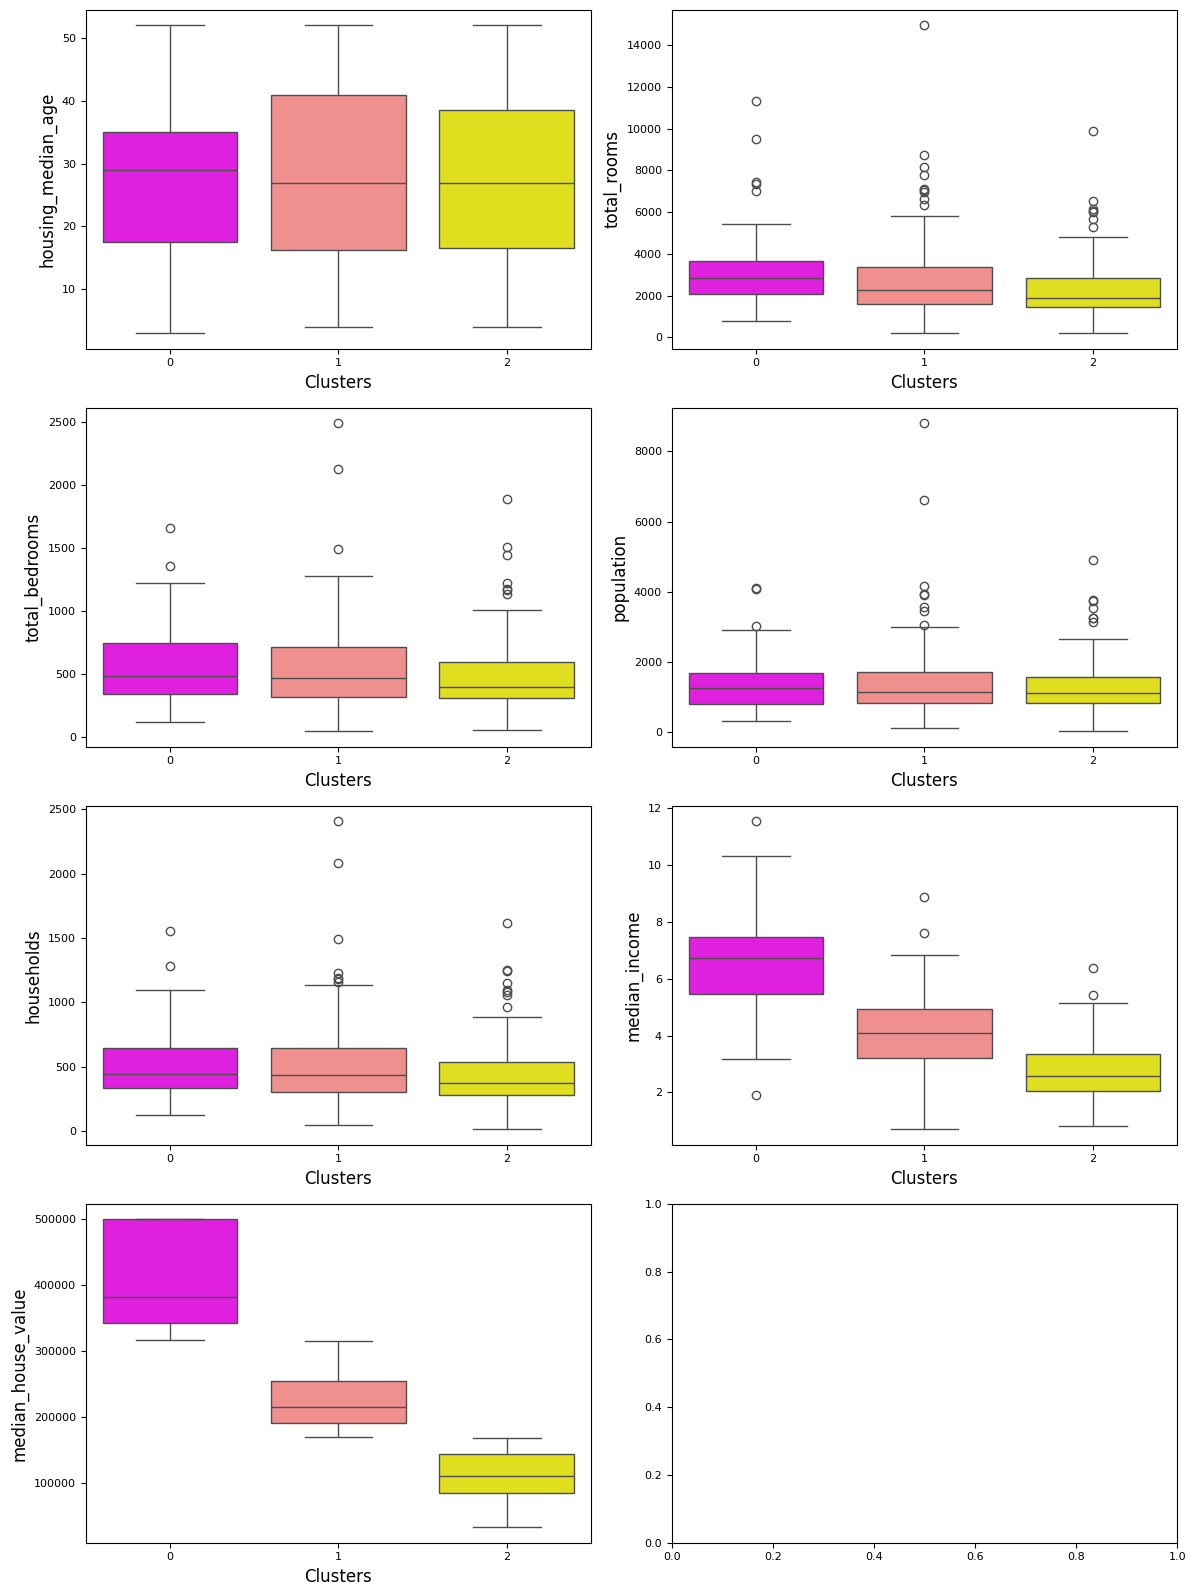

In [51]:
fig, axes = plt.subplots(4, 2, figsize=(12, 16))
axes = axes.flatten()

# box plots
for i, feature in enumerate(features):
    sns.boxplot(data=df_sample, x='labels_3', y=feature, ax=axes[i], hue='labels_3', palette='spring', legend=False)
    axes[i].set_xlabel('Clusters')
    axes[i].set_ylabel(feature)

plt.tight_layout()

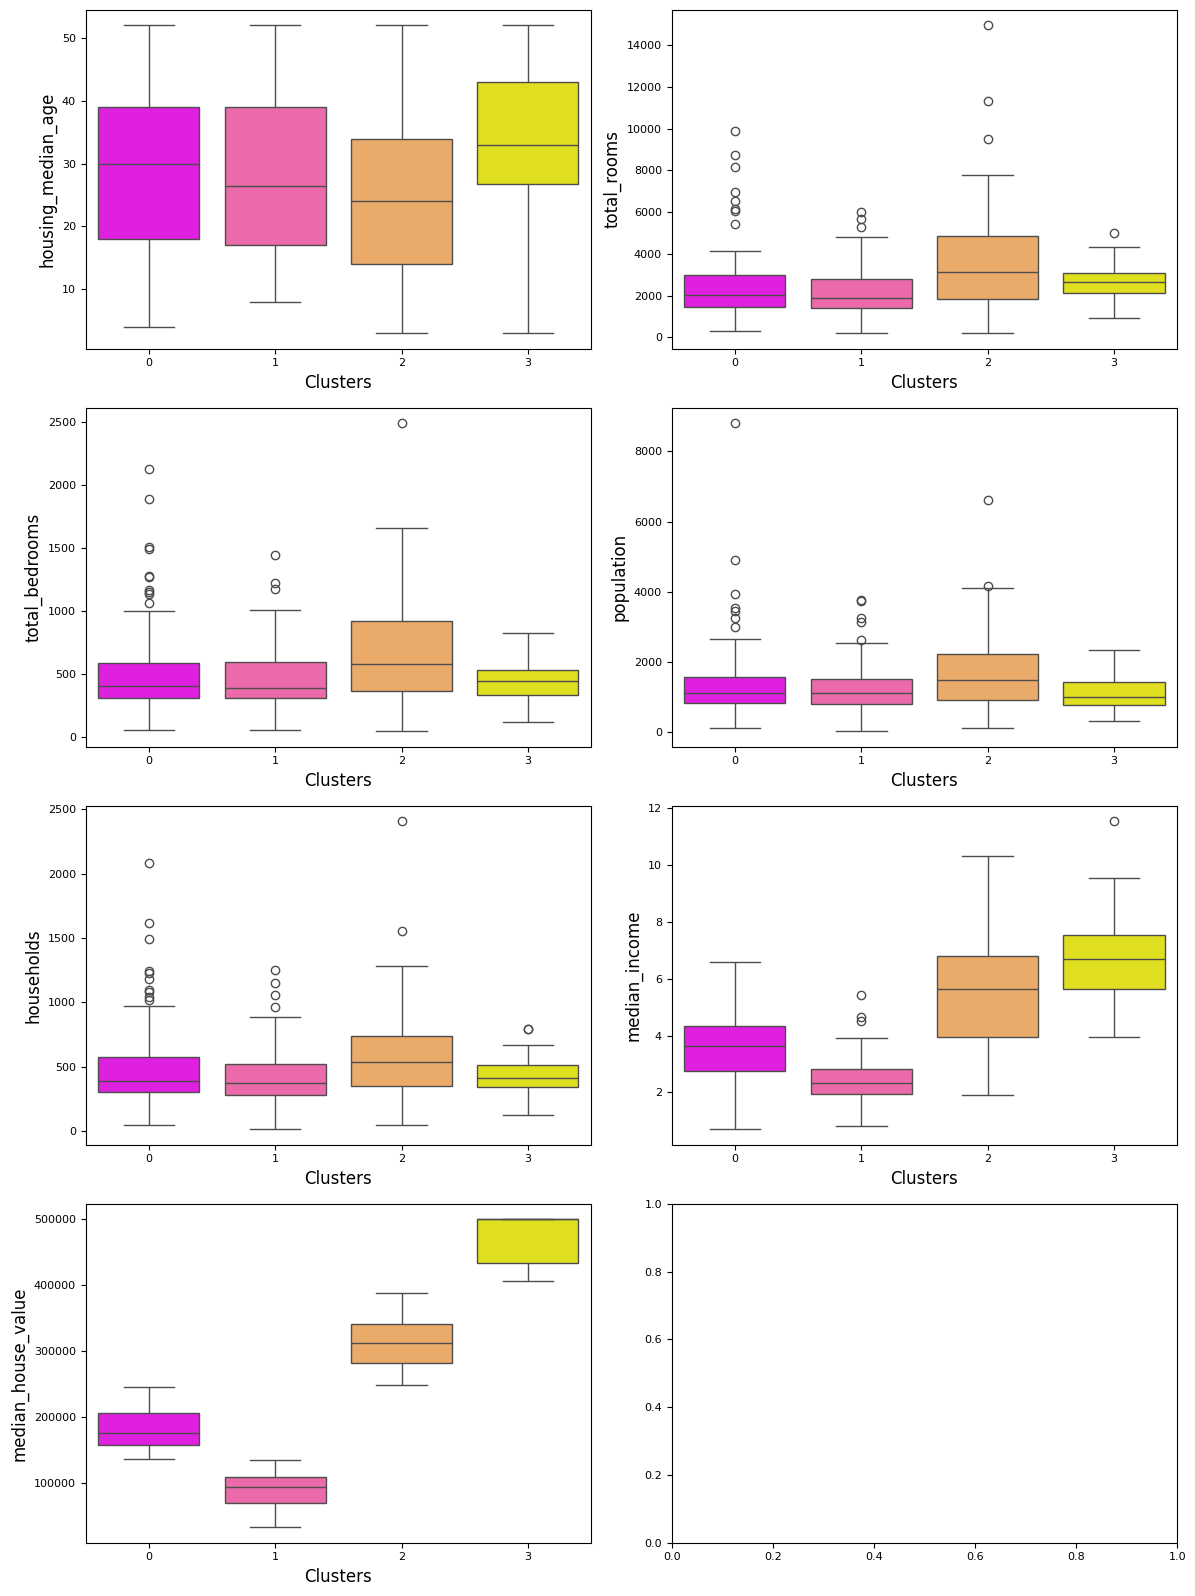

In [52]:
fig, axes = plt.subplots(4, 2, figsize=(12, 16))
axes = axes.flatten()

# box plots
for i, feature in enumerate(features):
    sns.boxplot(data=df_sample, x='labels_4', y=feature, ax=axes[i], hue='labels_4', palette='spring', legend=False)
    axes[i].set_xlabel('Clusters')
    axes[i].set_ylabel(feature)

plt.tight_layout()

### **Other Methods**

### Elbow Method

Text(0, 0.5, 'SSE')

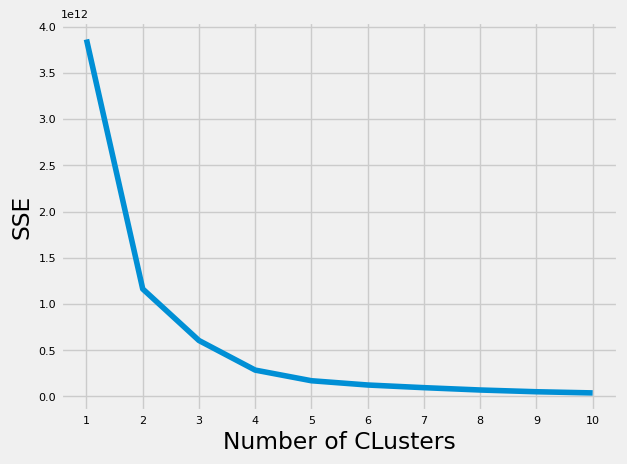

In [53]:
kmeans_kwargs = {
       "init": "random",
       "n_init": 10,
       "max_iter": 300,
     "random_state": 35,
  }

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_sample)
    sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1,11), sse)
plt.xticks(range(1,11))
plt.xlabel("Number of CLusters")
plt.ylabel("SSE")

In [54]:
kl = KneeLocator(range(1,11), sse, curve="convex", direction="decreasing")

In [55]:
kl.elbow

3

### Silhoutte Score

In [56]:
silhouette_coefficients = []

for k in range(2, 11):
    kmeans=KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_sample)

    # Compute Sihoutte Score
    score = silhouette_score(df_sample, kmeans.labels_)
    
    silhouette_coefficients.append(score)

Text(0, 0.5, 'Silhouette Coefficient')

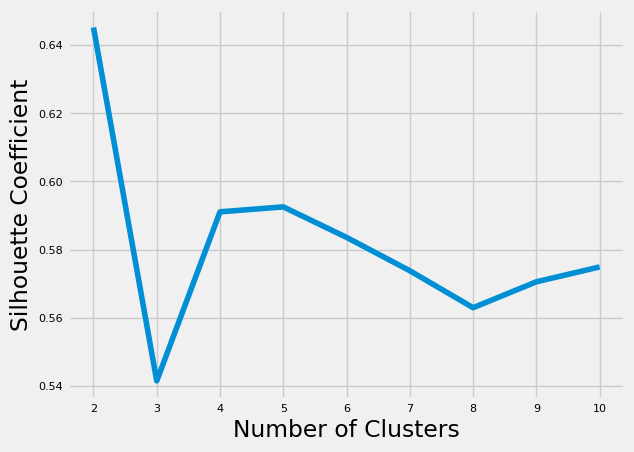

In [57]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")

### Davies Bouldin Index

In [58]:
db_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_sample)
    
    # Compute Davies-Bouldin index
    db_score = davies_bouldin_score(df_sample, kmeans.labels_)
    
    db_scores.append(db_score)

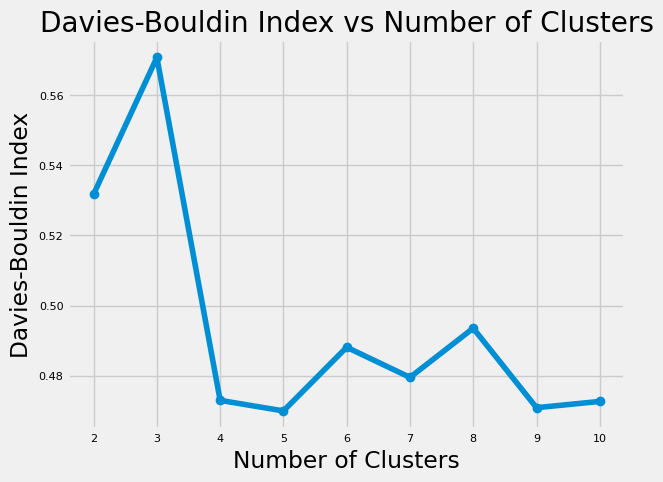

In [59]:
plt.plot(range(2, 11), db_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index vs Number of Clusters')
plt.xticks(range(2, 11))
plt.grid(True)

### Calinski-Harabasz Index

In [60]:
ch_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_sample)
    
    # Compute the Calinski-Harabasz index
    ch_score = calinski_harabasz_score(df_sample, kmeans.labels_)
    
    ch_scores.append(ch_score)

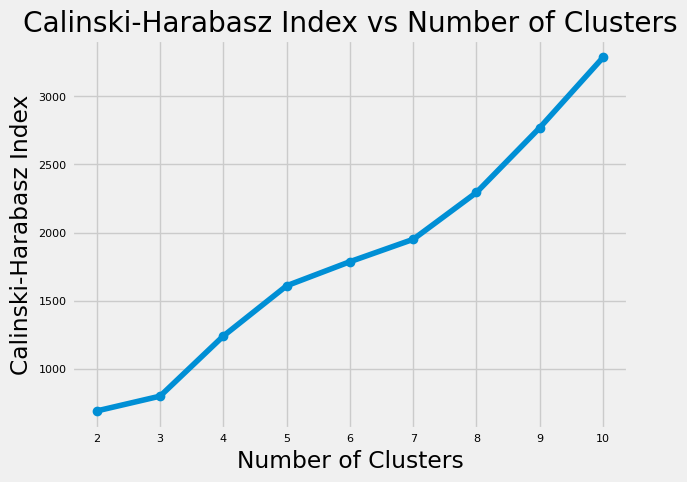

In [61]:
plt.plot(range(2, 11), ch_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index vs Number of Clusters')
plt.xticks(range(2, 11))
plt.grid(True)

## **K-Means on Standardized data**

In [62]:
kmeans_2_scaled = KMeans(
    init = "random",
    n_clusters=2,
    n_init=10,
    max_iter=300,
    random_state=35
)

kmeans_3_scaled = KMeans(
    init = "random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=35
)

kmeans_4_scaled = KMeans(
    init = "random",
    n_clusters=4,
    n_init=10,
    max_iter=300,
    random_state=35
)

In [63]:
kmeans_2_scaled.fit(df_scaled)
kmeans_3_scaled.fit(df_scaled)
kmeans_4_scaled.fit(df_scaled)

KMeans(init='random', n_clusters=4, n_init=10, random_state=35)

In [64]:
labels_2_scaled = kmeans_2.labels_
labels_3_scaled = kmeans_3.labels_
labels_4_scaled = kmeans_4.labels_

In [65]:
df_sample['labels_2_scaled']=labels_2_scaled
df_sample['labels_3_scaled']=labels_3_scaled
df_sample['labels_4_scaled']=labels_4_scaled
df_scaled['labels_2_scaled']=labels_2_scaled
df_scaled['labels_3_scaled']=labels_3_scaled
df_scaled['labels_4_scaled']=labels_4_scaled

In [66]:
df_sample.head(20)

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,labels_2,labels_3,labels_4,labels_2_scaled,labels_3_scaled,labels_4_scaled
189,38.0,1663.0,295.0,781.0,301.0,5.0519,227000.0,1,1,0,1,1,0
123,5.0,2840.0,403.0,1363.0,403.0,7.6180,341400.0,0,0,2,0,0,2
185,13.0,5415.0,827.0,2061.0,714.0,7.3681,353100.0,0,0,2,0,0,2
213,14.0,2714.0,361.0,1259.0,375.0,7.7738,387500.0,0,0,2,0,0,2
106,52.0,2805.0,573.0,1325.0,522.0,2.5083,70100.0,1,2,1,1,2,1
127,17.0,2414.0,594.0,2487.0,582.0,1.0955,62700.0,1,2,1,1,2,1
176,51.0,1905.0,291.0,707.0,284.0,6.2561,431000.0,0,0,3,0,0,3
73,52.0,2867.0,496.0,978.0,513.0,3.1477,291200.0,0,1,2,0,1,2
275,16.0,1914.0,446.0,828.0,332.0,2.0577,69000.0,1,2,1,1,2,1
242,31.0,602.0,153.0,112.0,47.0,1.0667,34200.0,1,2,1,1,2,1


In [67]:
df_scaled.head(5)

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,labels_2_scaled,labels_3_scaled,labels_4_scaled
0,0.715348,-0.524490,-0.681864,-0.626197,-0.594170,0.690372,0.264157,1,1,0
1,-1.738547,0.112823,-0.362194,-0.017281,-0.267169,2.100693,1.272633,0,0,2
2,-1.143664,1.507115,0.892807,0.713001,0.729865,1.963349,1.375772,0,0,2
3,-1.069303,0.044597,-0.486510,-0.126090,-0.356934,2.186321,1.679020,0,0,2
4,1.756394,0.093871,0.140990,-0.057038,0.114333,-0.707583,-1.118970,1,2,1


In [68]:
df_scaled['labels_2_scaled'].value_counts()

labels_2_scaled
1    221
0     79
Name: count, dtype: int64

In [69]:
df_scaled['labels_3_scaled'].value_counts()

labels_3_scaled
2    151
1    102
0     47
Name: count, dtype: int64

In [70]:
df_scaled['labels_4_scaled'].value_counts()

labels_4_scaled
0    121
1    100
2     57
3     22
Name: count, dtype: int64

In [71]:
df_sample.groupby('labels_2_scaled').mean()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,labels_2,labels_3,labels_4,labels_3_scaled,labels_4_scaled
labels_2_scaled,,,,,,,,,,,,
0,27.367089,3540.835443,614.962025,1563.291139,572.367089,5.789301,355683.721519,0.0,0.405063,2.278481,0.405063,2.278481
1,28.742081,2306.628959,493.339367,1313.823529,455.583710,3.083134,140322.624434,1.0,1.683258,0.452489,1.683258,0.452489


In [72]:
df_sample.groupby('labels_3_scaled').mean()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,labels_2,labels_3,labels_4,labels_2_scaled,labels_4_scaled
labels_3_scaled,,,,,,,,,,,,
0,28.234043,3365.234043,578.021277,1393.489362,533.893617,6.386904,406627.957447,0.000000,0.0,2.468085,0.000000,2.468085
1,29.088235,2878.509804,567.745098,1481.921569,537.431373,4.128463,226902.941176,0.686275,1.0,0.627451,0.686275,0.627451
2,27.947020,2236.536424,480.350993,1305.993377,437.019868,2.764501,111620.529801,1.000000,2.0,0.662252,1.000000,0.662252


In [73]:
df_sample.groupby('labels_4_scaled').mean()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,labels_2,labels_3,labels_4,labels_2_scaled,labels_3_scaled
labels_4_scaled,,,,,,,,,,,,
0,29.31405,2448.256198,517.181818,1373.471074,485.793388,3.642327,181378.512397,1.0,1.421488,0.0,1.0,1.421488
1,28.05000,2135.260000,464.490000,1241.650000,419.030000,2.406510,90645.000000,1.0,2.000000,1.0,1.0,2.000000
2,25.00000,3841.736842,673.157895,1732.666667,620.929825,5.406139,309985.964912,0.0,0.561404,2.0,0.0,0.561404
3,33.50000,2761.227273,464.181818,1124.454545,446.545455,6.782041,474082.454545,0.0,0.000000,3.0,0.0,0.000000


In [74]:
kmeans_2_scaled.cluster_centers_[:, :7]

array([[-0.92615944,  1.92980188,  1.95445118,  1.73963284,  1.90698992,
         0.52026764,  0.43460243],
       [ 0.14248607, -0.2968926 , -0.3006848 , -0.26763582, -0.29338306,
        -0.08004118, -0.06686191]])

In [75]:
kmeans_3_scaled.cluster_centers_[:, :7]

array([[ 0.26535183, -0.41961754, -0.35914249, -0.32606417, -0.36840231,
        -0.49429311, -0.48930936],
       [-0.88446447,  1.99264557,  2.09156887,  1.94347948,  2.10739278,
         0.25530469,  0.23655267],
       [-0.28904222,  0.16427055, -0.04973616, -0.06711735, -0.03223521,
         1.22474929,  1.22037568]])

In [76]:
kmeans_4_scaled.cluster_centers_[:, :7]

array([[-0.93202247,  2.35945515,  2.29967309,  2.35774459,  2.4002602 ,
         0.49975911,  0.33217107],
       [-0.62486991,  0.24557195,  0.39006984,  0.24405052,  0.34430007,
        -0.17973481, -0.28459796],
       [-0.07074866,  0.07764941, -0.22694432, -0.24036642, -0.21476211,
         1.56598806,  1.67013544],
       [ 0.58588547, -0.62064635, -0.5914909 , -0.50727877, -0.58628222,
        -0.53431624, -0.47480331]])

In [77]:
kmeans_2_scaled.n_iter_

28

In [78]:
kmeans_3_scaled.n_iter_

11

In [79]:
kmeans_4_scaled.n_iter_

12

### K-means for different k values

In [80]:
# k values
k_values = [2, 3, 4, 5, 6, 7, 8, 9, 10]

# lists to store results
k_list = []
inertia_list = []
cluster_sizes_list = []
centroids_list = []
iterations_list = []

# Iteration for different number of centroids
for k in k_values:
    # Initialize KMeans with the current k value
    kmeans = KMeans(
    init = "random",
    n_clusters=k,
    n_init=10,
    max_iter=300,
    random_state=35
    )
    
    # Fit KMeans to the data
    kmeans.fit(df_scaled)
  
    # Get the inertia (SSE)
    inertia = kmeans.inertia_

    # Get the number of observations in each cluster
    cluster_sizes = pd.Series(kmeans.labels_).value_counts().sort_index().tolist()

    # Get the cluster centers (centroids)
    centroids = kmeans.cluster_centers_[: ,:7]

    # Get the number of iterations required for convergence
    iterations = kmeans.n_iter_

    # Append results to lists
    k_list.append(k)
    inertia_list.append(inertia)
    cluster_sizes_list.append(cluster_sizes)
    centroids_list.append(centroids)
    iterations_list.append(iterations)

# Create a DataFrame to store the results
final_df_scaled = pd.DataFrame({
    'k': k_list,
    'inertia': inertia_list,
    'cluster_sizes': cluster_sizes_list,
    'centroids': centroids_list,
    'iterations': iterations_list
})

# Display the results
table = PrettyTable()
table.field_names = final_df.columns

for column in final_df_scaled.columns:
    table.max_width[column] = 50
for row in final_df_scaled.values:
    table.add_row(row)
    
print(table)

+----+--------------------+-----------------------------------------+----------------------------------------------------+------------+
| k  |      inertia       |              cluster_sizes              |                     centroids                      | iterations |
+----+--------------------+-----------------------------------------+----------------------------------------------------+------------+
| 2  | 1781.5848718480747 |                [83, 217]                | [[-0.39916333  0.94794333  0.83464263  0.73866576  |     11     |
|    |                    |                                         |               0.84404126  0.96112352               |            |
|    |                    |                                         |                      1.13137635]                   |            |
|    |                    |                                         |  [ 0.15267537 -0.3625774  -0.31924119 -0.28253114  |            |
|    |                    |                     

In [81]:
final_df

,k,inertia,cluster_sizes,centroids,iterations
0,2,1.162573e+12,"[79, 221]","[[27.367088607594937, 3540.835443037975, 614.9...",9
1,3,6.044871e+11,"[47, 102, 151]","[[28.23404255319149, 3365.2340425531916, 578.0...",7
2,4,2.843646e+11,"[121, 100, 57, 22]","[[29.31404958677686, 2448.2561983471073, 517.1...",20
3,5,1.691824e+11,"[89, 54, 22, 43, 92]","[[28.865168539325843, 2367.76404494382, 497.0,...",4
4,6,1.230764e+11,"[21, 58, 82, 16, 34, 89]","[[24.04761904761905, 4328.428571428572, 708.42...",16
5,7,9.433828e+10,"[70, 57, 31, 19, 34, 52, 37]","[[28.271428571428572, 2456.5714285714284, 514....",45
6,8,6.897229e+10,"[57, 59, 37, 40, 31, 23, 17, 36]","[[25.56140350877193, 2238.754385964912, 484.36...",17
7,9,5.007916e+10,"[32, 39, 26, 29, 15, 9, 56, 57, 37]","[[29.84375, 2637.875, 580.59375, 1458.00000000...",16
8,10,3.752571e+10,"[27, 17, 15, 8, 44, 38, 37, 37, 25, 52]","[[28.62962962962963, 2817.3703703703704, 548.8...",11


### **ANOVA Analysis**

In [82]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  300 non-null    float64
 1   total_rooms         300 non-null    float64
 2   total_bedrooms      300 non-null    float64
 3   population          300 non-null    float64
 4   households          300 non-null    float64
 5   median_income       300 non-null    float64
 6   median_house_value  300 non-null    float64
 7   labels_2_scaled     300 non-null    int32  
 8   labels_3_scaled     300 non-null    int32  
 9   labels_4_scaled     300 non-null    int32  
dtypes: float64(7), int32(3)
memory usage: 20.1 KB


In [83]:
create_anova_table("labels_2_scaled", df_scaled, features)

,Feature,Sum Sq,DF,F-value,PR(>F)
0,housing_median_age,0.118021,1.0,0.605563,0.437081
1,Residual,58.078646,298.0,,
2,total_rooms,5.042008,1.0,28.266917,0.0
3,Residual,53.154659,298.0,,
4,total_bedrooms,1.463053,1.0,7.684858,0.005919
5,Residual,56.733614,298.0,,
6,population,0.769083,1.0,3.990883,0.046656
7,Residual,57.427584,298.0,,
8,households,1.582472,1.0,8.329652,0.004185
9,Residual,56.614195,298.0,,


In [84]:
create_anova_table("labels_3_scaled", df_scaled, features)

,Feature,Sum Sq,DF,F-value,PR(>F)
0,housing_median_age,0.063121,1.0,0.116194,0.733439
1,Residual,161.883546,298.0,,
2,total_rooms,8.661094,1.0,16.837894,0.000053
3,Residual,153.285572,298.0,,
4,total_bedrooms,2.510696,1.0,4.692715,0.031083
5,Residual,159.435970,298.0,,
6,population,0.504510,1.0,0.931256,0.335319
7,Residual,161.442157,298.0,,
8,households,3.211508,1.0,6.029095,0.014643
9,Residual,158.735159,298.0,,


In [85]:
create_anova_table("labels_4_scaled", df_scaled, features)

,Feature,Sum Sq,DF,F-value,PR(>F)
0,housing_median_age,0.119145,1.0,0.134211,0.714365
1,Residual,264.547522,298.0,,
2,total_rooms,9.170245,1.0,10.695778,0.0012
3,Residual,255.496421,298.0,,
4,total_bedrooms,1.319699,1.0,1.493354,0.222662
5,Residual,263.346968,298.0,,
6,population,0.338963,1.0,0.382143,0.536931
7,Residual,264.327703,298.0,,
8,households,1.227884,1.0,1.388974,0.239519
9,Residual,263.438782,298.0,,


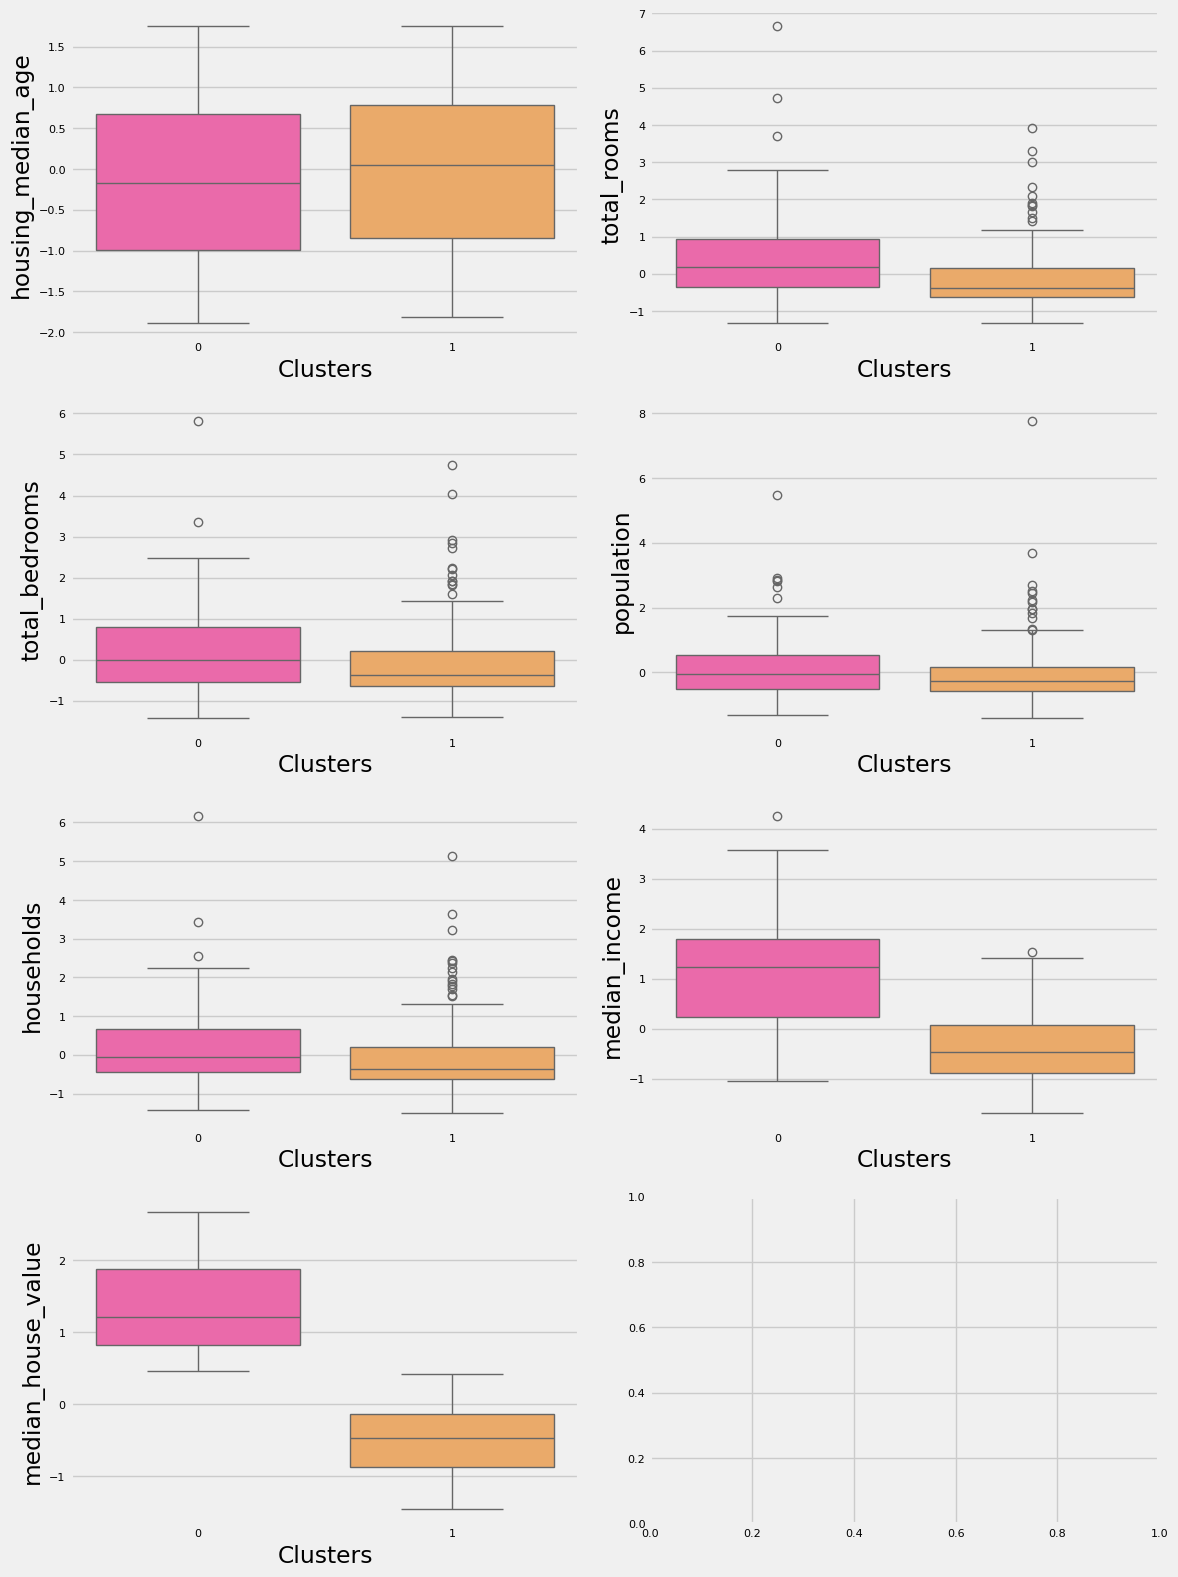

In [86]:
fig, axes = plt.subplots(4, 2, figsize=(12, 16))
axes = axes.flatten()

# box plots
for i, feature in enumerate(features):
    sns.boxplot(data=df_scaled, x='labels_2_scaled', y=feature, ax=axes[i], hue='labels_2_scaled', palette='spring', legend=False)
    axes[i].set_xlabel('Clusters')
    axes[i].set_ylabel(feature)

plt.tight_layout()

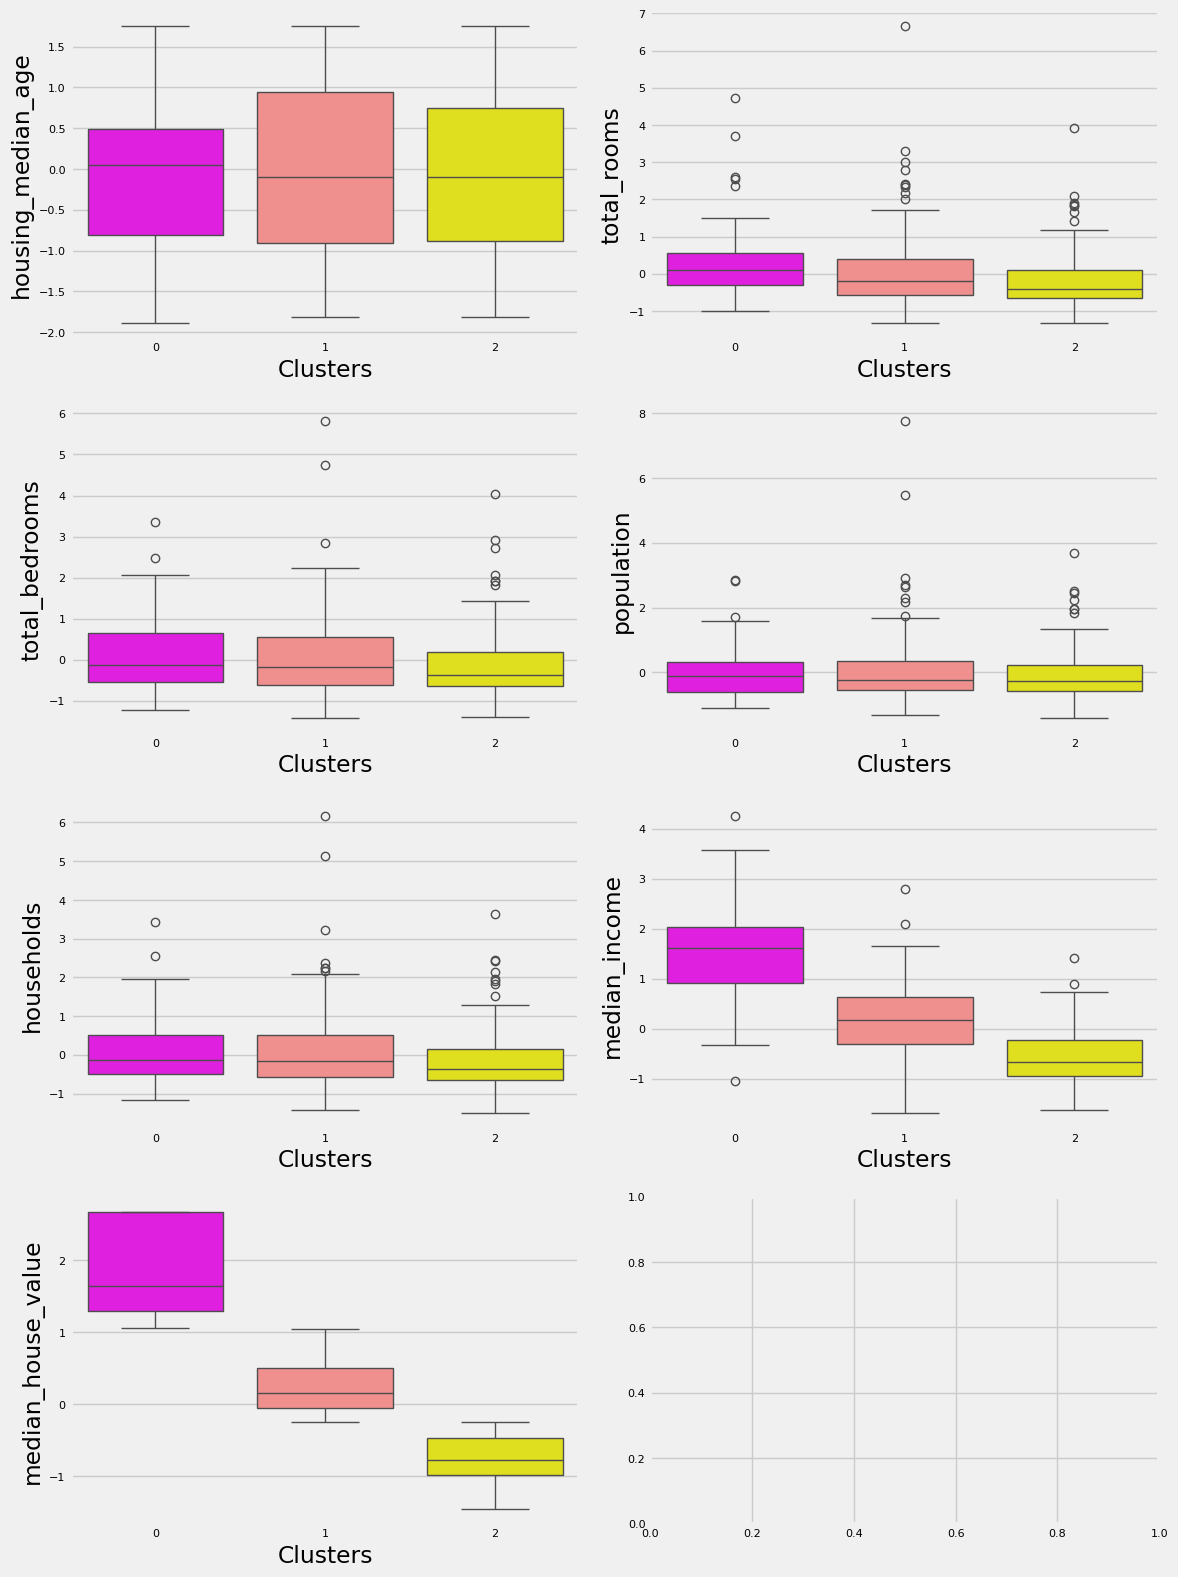

In [87]:
fig, axes = plt.subplots(4, 2, figsize=(12, 16))
axes = axes.flatten()

# box plots
for i, feature in enumerate(features):
    sns.boxplot(data=df_scaled, x='labels_3_scaled', y=feature, ax=axes[i], hue='labels_3_scaled', palette='spring', legend=False)
    axes[i].set_xlabel('Clusters')
    axes[i].set_ylabel(feature)

plt.tight_layout()

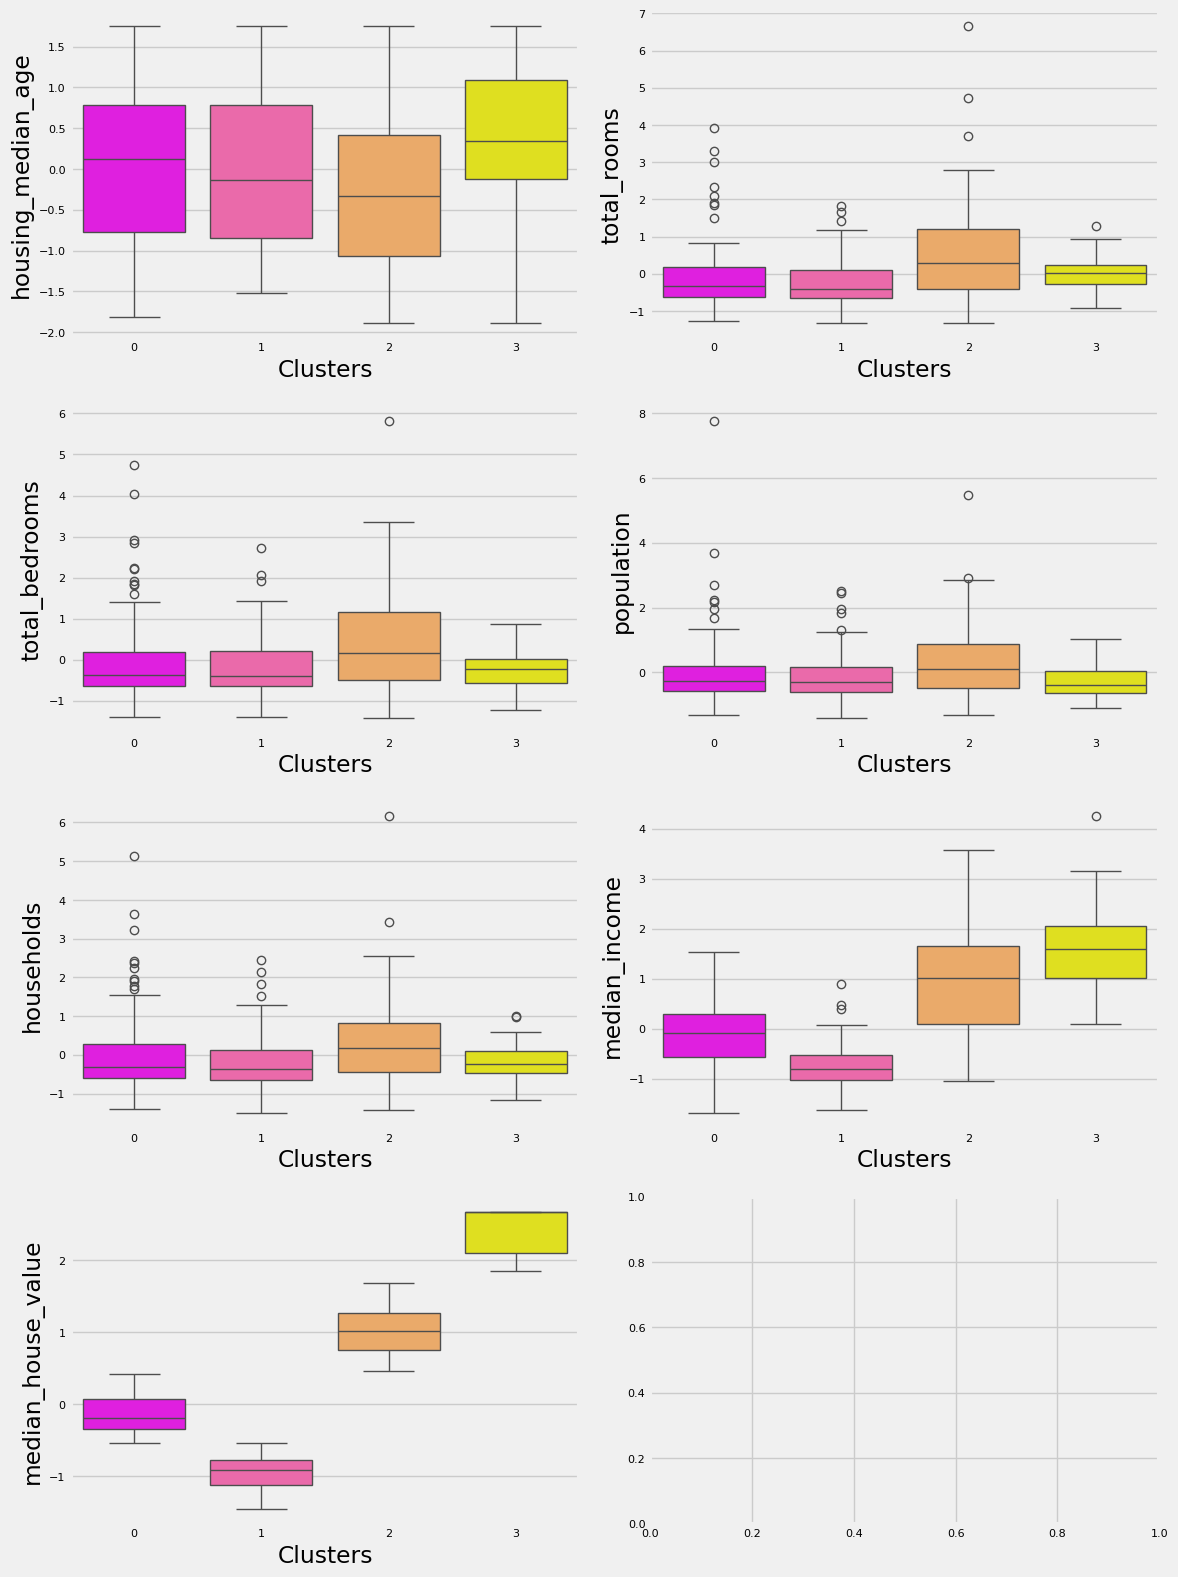

In [88]:
fig, axes = plt.subplots(4, 2, figsize=(12, 16))
axes = axes.flatten()

# box plots
for i, feature in enumerate(features):
    sns.boxplot(data=df_scaled, x='labels_4_scaled', y=feature, ax=axes[i], hue='labels_4_scaled', palette='spring', legend=False)
    axes[i].set_xlabel('Clusters')
    axes[i].set_ylabel(feature)

plt.tight_layout()

### **Other Methods**

### Elbow Method

Text(0.5, 1.0, 'SSE vs Number of Clusters')

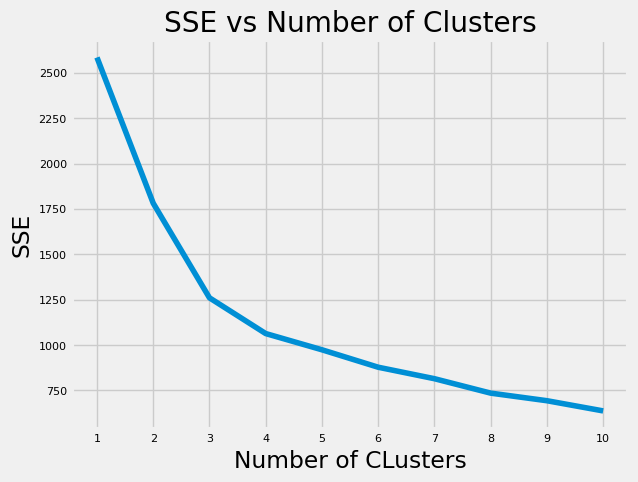

In [89]:
kmeans_kwargs = {
       "init": "random",
       "n_init": 10,
       "max_iter": 300,
     "random_state": 35,
  }

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1,11), sse)
plt.xticks(range(1,11))
plt.xlabel("Number of CLusters")
plt.ylabel("SSE")
plt.title('SSE vs Number of Clusters')

In [90]:
kl = KneeLocator(range(1,11), sse, curve="convex", direction="decreasing")

In [91]:
kl.elbow

3

### Silhoutte Score

In [92]:
silhouette_coefficients = []

for k in range(2, 11):
  kmeans=KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(df_scaled)
  score = silhouette_score(df_scaled, kmeans.labels_)
  silhouette_coefficients.append(score)

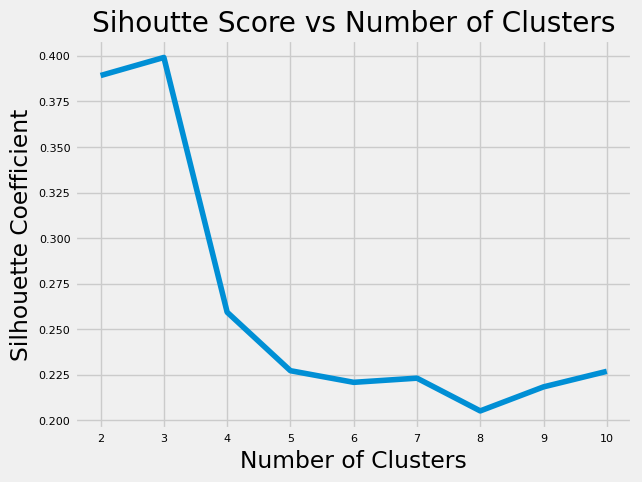

In [93]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.title('Sihoutte Score vs Number of Clusters')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

### DB Index

In [94]:
db_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_scaled)
    
    # Compute Davies-Bouldin index
    db_score = davies_bouldin_score(df_scaled, kmeans.labels_)
    
    db_scores.append(db_score)

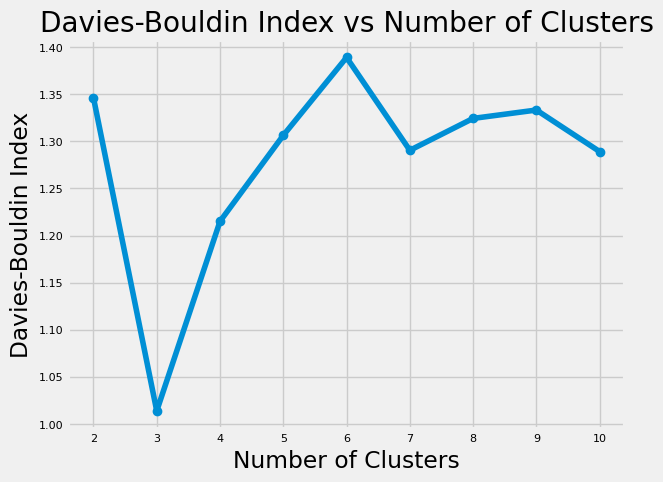

In [95]:
plt.plot(range(2, 11), db_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index vs Number of Clusters')
plt.xticks(range(2, 11))
plt.grid(True)

### Calinski-Harabasz Index

In [96]:
ch_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_scaled)
    
    # Compute the Calinski-Harabasz index
    ch_score = calinski_harabasz_score(df_scaled, kmeans.labels_)
    
    ch_scores.append(ch_score)

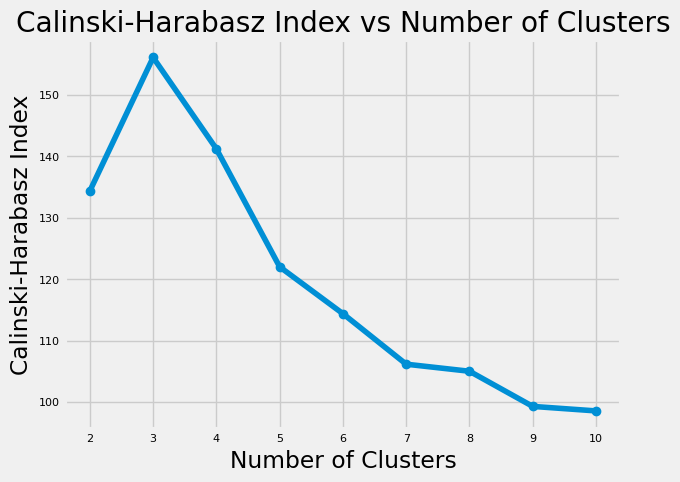

In [97]:
plt.plot(range(2, 11), ch_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index vs Number of Clusters')
plt.xticks(range(2, 11))
plt.grid(True)